## Импорты и отрисовка графиков


In [48]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from prompt_toolkit.contrib.regular_languages.compiler import Match
from scipy.stats import norm, gamma


def print_hist(lst, label, title):
    plt.hist(lst, bins=100, density=True, alpha=0.6, color='skyblue', label=label)
    plt.xlabel("y")
    plt.title(title)

## Задание 1

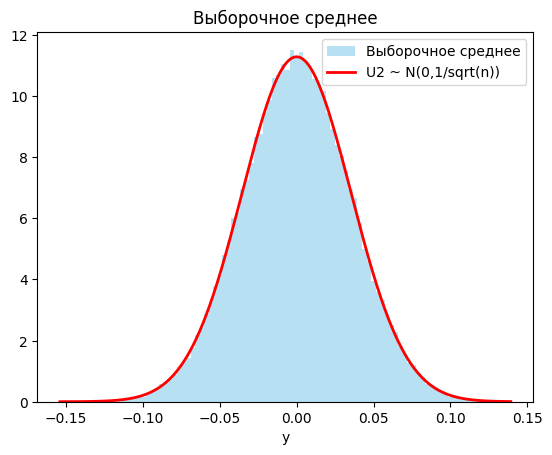

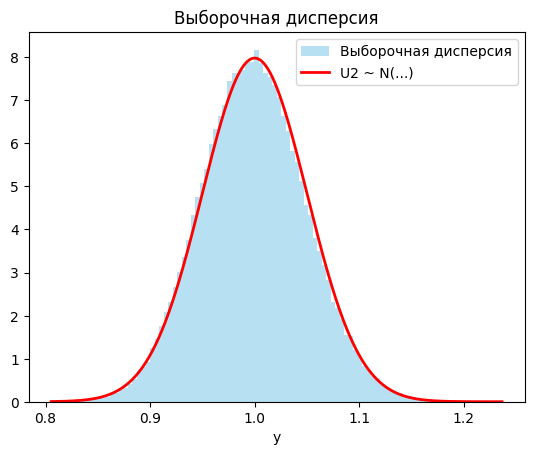

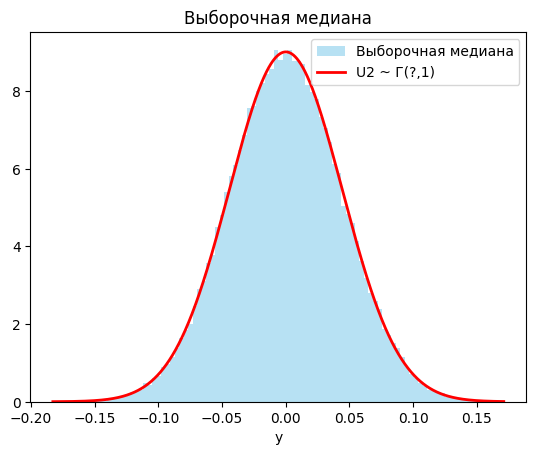

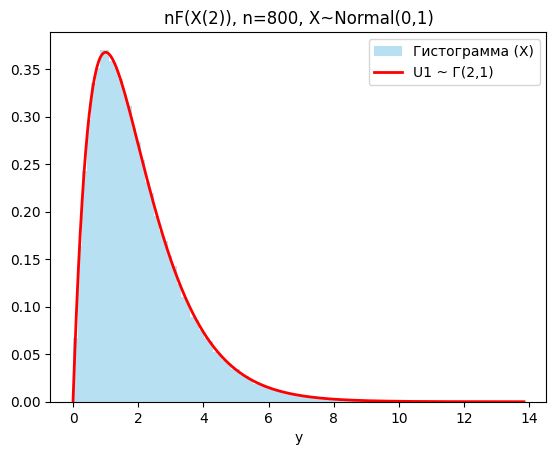

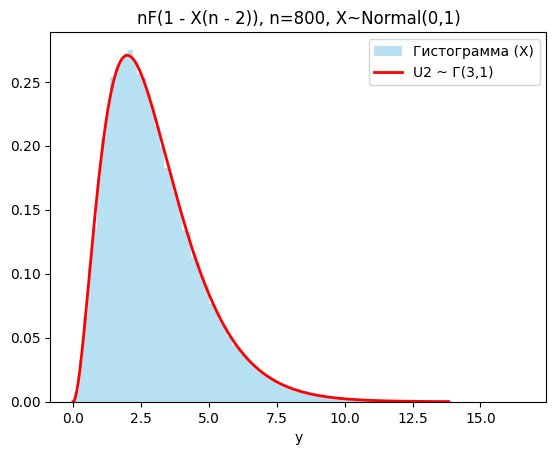

In [62]:
n = 800
Nsim = 100000

X = norm.rvs(size=(Nsim, n))
X_sorted = np.sort(X, axis=1)

U1 = n * norm.cdf(X_sorted[:, 1])
U2 = n * (1 - norm.cdf(X_sorted[:, -3]))
s_n = sqrt(n)
mean = np.mean(X_sorted, axis=1)
var = np.var(X_sorted, axis=1)
median = np.quantile(X_sorted, 0.5, axis=1)

print_hist(mean, 'Выборочное среднее', 'Выборочное среднее')
x_vals = np.linspace(np.min(mean), np.max(mean), 10000)
plt.plot(x_vals, norm.pdf(x_vals, 0, 1 / s_n), 'r-', lw=2, label='U2 ~ N(0,1/sqrt(n))')
plt.legend()
plt.show()

sigma = sqrt(abs((norm(0, 1).moment(4) - norm(0, 1).moment(2) ** 2) / n))
mu = norm(0, 1).var()
print_hist(var, 'Выборочная дисперсия', 'Выборочная дисперсия')
x_vals = np.linspace(np.min(var), np.max(var), 10000)
plt.plot(x_vals, norm.pdf(x_vals, mu, sigma), 'r-', lw=2, label='U2 ~ N(...)')
plt.legend()
plt.show()

print_hist(median, 'Выборочная медиана', 'Выборочная медиана')
x_vals = np.linspace(np.min(median), np.max(median), 10000)
plt.plot(x_vals, norm.pdf(x_vals, 0, 1/sqrt((4*n*(norm.pdf(0) ** 2)))), 'r-', lw=2, label='U2 ~ Г(?,1)')
plt.legend()
plt.show()

print_hist(U1, 'Гистограмма (X)', f"nF(X(2)), n={n}, X~Normal(0,1)")
x_vals = np.linspace(0, np.max(U1), 500)
plt.plot(x_vals, gamma.pdf(x_vals, a=2, scale=1), 'r-', lw=2, label='U1 ~ Г(2,1)')
plt.legend()
plt.show()

print_hist(U2, 'Гистограмма (X)', f"nF(1 - X(n - 2)), n={n}, X~Normal(0,1)")
x_vals = np.linspace(0, np.max(U1), 500)
plt.plot(x_vals, gamma.pdf(x_vals, a=3, scale=1), 'r-', lw=2, label='U2 ~ Г(3,1)')
plt.legend()
plt.show()

## Задание 2
